## KMeans Customer Segmentation


**Objective:** Unsupervised learning by clustering mall customers into segments using `Age`, `Annual Income (k$)` and `Spending Score (1-100)`.


**What you'll learn:**
- Basic EDA (exploratory data analysis)
- Preprocessing and scaling
- Choosing number of clusters (Elbow method & silhouette)
- Training KMeans and visualizing clusters using `matplotlib`

## Install Packages

In [3]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 1.6 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 2.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.4 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.4 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.4 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.2 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 2.2 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 2.1 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 2.1 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 2.0 MB/s eta 0:00:02
   --------------------------- --

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Load Dataset

Download the data from -> https://www.kaggle.com/code/mattop/mall-customers-k-means-clustering/input

In [5]:
df = pd.read_csv("Mall_Customers.csv")
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Quick EDA
Check data types, ranges, and missing values so we know whether preprocessing is needed.

In [7]:
print(df.info())
print('\nSummary statistics:')
print(df[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000     

In [9]:
# Check for missing values
print('\nMissing values per column:')
print(df.isna().sum())


Missing values per column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Select Relevant Features
We only use these 3 features because they define customer spending behavior.

In [11]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Scale the Features
* K-Means uses distance-based calculation — scaling ensures all features contribute equally.
* StandardScaler converts all features to have mean 0 and standard deviation 1.

In [12]:
# Scale the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show the first 5 scaled values
X_scaled[:5]


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

### Find the Optimal Number of Clusters (Elbow Method)
* We loop k from 1 to 10.
* inertia_ shows how far points are from the cluster center — lower is better.
* The “elbow point” is where inertia starts decreasing slowly — that’s the best k.

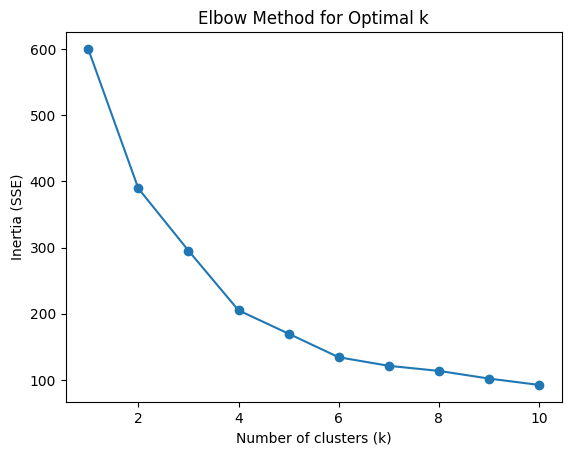

In [13]:
# Find the optimal number of clusters using the Elbow Method
inertia = []  # to store SSE (sum of squared errors)
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)  # store SSE for each k

# Plot the Elbow Curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.show()


### Train the Final KMeans Model
* We train KMeans with the chosen number of clusters (k=5).
* The labels_ attribute gives the cluster index for each customer.

In [16]:
# Based on the elbow method, let's assume k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
df['Cluster'] = kmeans.labels_

# Show first few labeled rows
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


### Visualize Clusters (2D)
* Each color = one customer segment.
* You can visually see groups (e.g., high-income & high-spending vs low-income & low-spending customers).

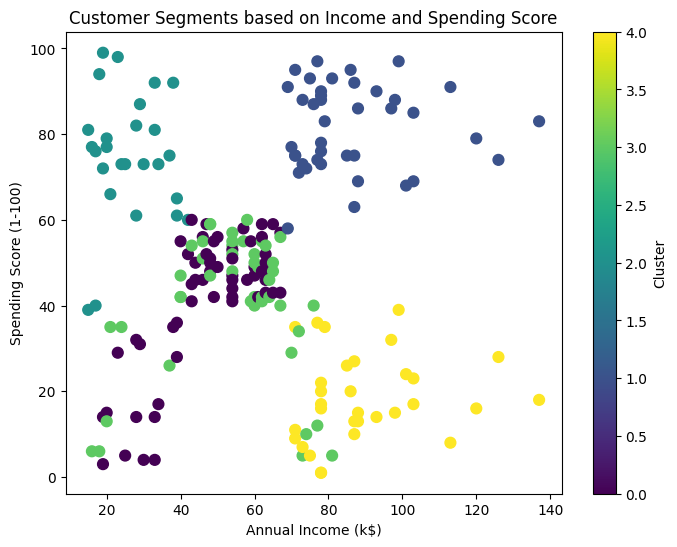

In [19]:
# Visualize clusters
plt.figure(figsize=(8, 6))

plt.scatter(
    df['Annual Income (k$)'], 
    df['Spending Score (1-100)'], 
    c=df['Cluster'], 
    cmap='viridis', 
    s=60
)

plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


### Analyze Cluster Characteristics

Helps you interpret the clusters.
Example:
* Cluster 0 → young, high spending, medium income
* Cluster 1 → older, low spending, low income

In [21]:
# Check average values per cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


In [23]:
cluster_names = {
    0: 'Average Spenders',
    1: 'Young Affluent Spenders',
    2: 'Young Impulsive Shoppers',
    3: 'Careful Young Buyers',
    4: 'Wealthy Low Spenders'
}


### Save the Model and Scaler

In [27]:
import joblib

# Save the trained KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the scaler used for feature scaling
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


### load and use the saved model

In [30]:
# Load model and scaler
kmeans_loaded = joblib.load('kmeans_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')



# Example: Predict cluster for a new customer
new_customer = [[28, 65, 75]]  # Age, Annual Income, Spending Score
new_customer_scaled = scaler_loaded.transform(new_customer)
predicted_cluster = kmeans_loaded.predict(new_customer_scaled)

print("Predicted cluster:", predicted_cluster[0])
print("Customer type:", cluster_names[predicted_cluster[0]])

Predicted cluster: 1
Customer type: Young Affluent Spenders


C:\Users\mpsof\anaconda3\envs\msenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
